In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, Flatten, BatchNormalization, LeakyReLU, Input, Dropout, Dense, Add, Dropout
from tensorflow.keras import Model, datasets, models
from tensorflow.keras.optimizers import Adam

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.tail()

data.shape

data.isnull().sum()

data.info()

data['Class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202103 entries, 0 to 202102
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    202103 non-null  float64
 1   V1      202103 non-null  float64
 2   V2      202103 non-null  float64
 3   V3      202103 non-null  float64
 4   V4      202103 non-null  float64
 5   V5      202103 non-null  float64
 6   V6      202103 non-null  float64
 7   V7      202103 non-null  float64
 8   V8      202103 non-null  float64
 9   V9      202103 non-null  float64
 10  V10     202103 non-null  float64
 11  V11     202103 non-null  float64
 12  V12     202103 non-null  float64
 13  V13     202103 non-null  float64
 14  V14     202103 non-null  float64
 15  V15     202103 non-null  float64
 16  V16     202103 non-null  float64
 17  V17     202103 non-null  float64
 18  V18     202103 non-null  float64
 19  V19     202103 non-null  float64
 20  V20     202103 non-null  float64
 21  V21     20

0.0    201715
1.0       387
Name: Class, dtype: int64

In [ ]:
data['Class'].value_counts()

0.0    201715
1.0       387
Name: Class, dtype: int64

In [ ]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((201715, 31), (387, 31))

In [ ]:
#Balance Dataset
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape

((201715, 31), (387, 31))

In [ ]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(387, 31)

In [ ]:
data = fraud.append(non_fraud, ignore_index=True)
data.head()


<ipython-input-148-16e9b33bed2b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud, ignore_index=True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [ ]:
data['Class'].value_counts()

1.0    387
0.0    387
Name: Class, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train.shape

(619, 30)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, X_test.shape

((619, 30, 1), (155, 30, 1))

Epoch 1/10


<ipython-input-130-ee5d8e7489f6>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud).sample(frac=1, random_state=42)


3/3 [==============================] - 1s 12ms/step - loss: 1.0720 - accuracy: 0.4548
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 0.7992 - accuracy: 0.8748
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: 0.6104 - accuracy: 0.9063
Epoch 4/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3791 - accuracy: 0.9160
Epoch 5/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3491 - accuracy: 0.9087
Epoch 6/10
3/3 [==============================] - 0s 12ms/step - loss: 0.2995 - accuracy: 0.9378
Epoch 7/10
3/3 [==============================] - 0s 12ms/step - loss: 0.2323 - accuracy: 0.9459
Epoch 8/10
3/3 [==============================] - 0s 13ms/step - loss: 0.2226 - accuracy: 0.9378
Epoch 9/10
3/3 [==============================] - 0s 11ms/step - loss: 0.2017 - accuracy: 0.9540
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.9387
Test set accuracy: 0.9387096762657166
E

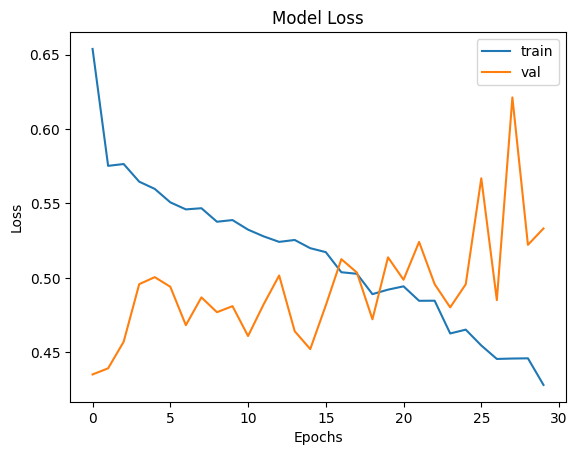

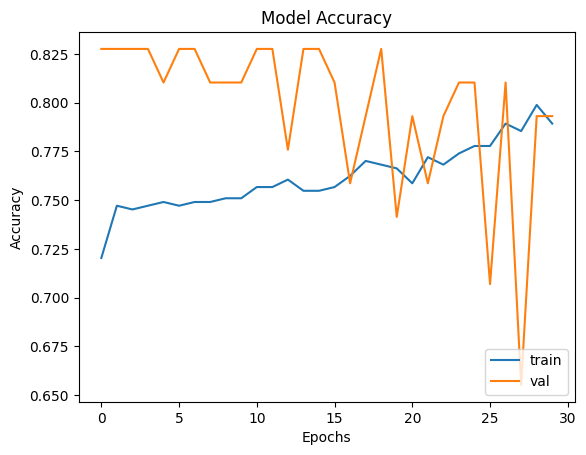

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
# Load dataset
data = pd.read_csv('creditcard.csv')

# Preprocessing
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0].sample(n=len(fraud)*3, random_state=42)
data = fraud.append(non_fraud).sample(frac=1, random_state=42)
X = data.drop(['Class', 'Time'], axis=1).values
y = data['Class'].values

# Reshape X for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitting into train and test sets
n_samples = X.shape[0]
train_size = int(n_samples * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, batch_size=512, epochs=10)



# Evaluating the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set accuracy:", accuracy)

#Loss and Accuracy Curves
train = model.fit( x_train, y_train, validation_split=0.1, batch_size=10, epochs=30)


plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.figure()
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()






10/10 [==============================] - 0s 2ms/step


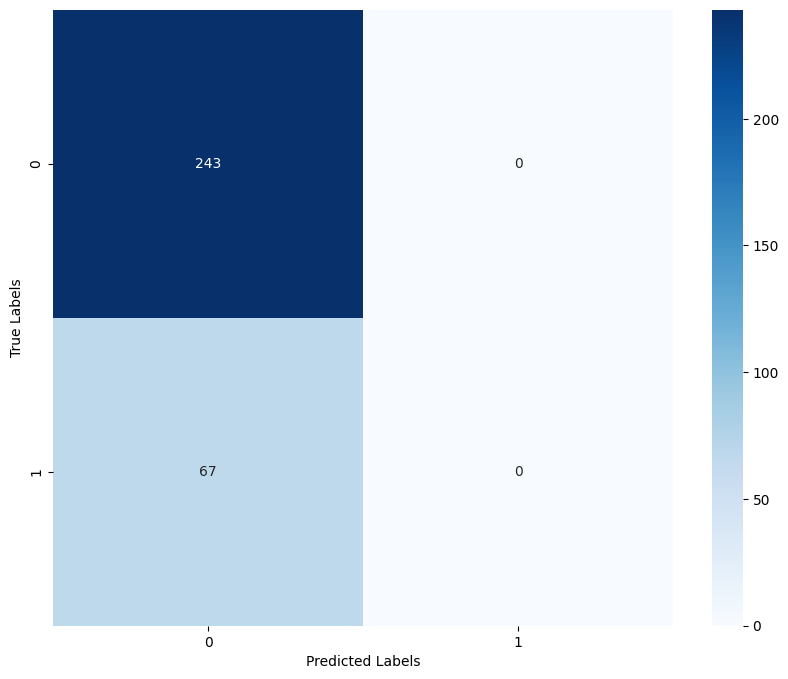

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.expand_dims(y_test, axis=1)


confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

10/10 [==============================] - 0s 2ms/step


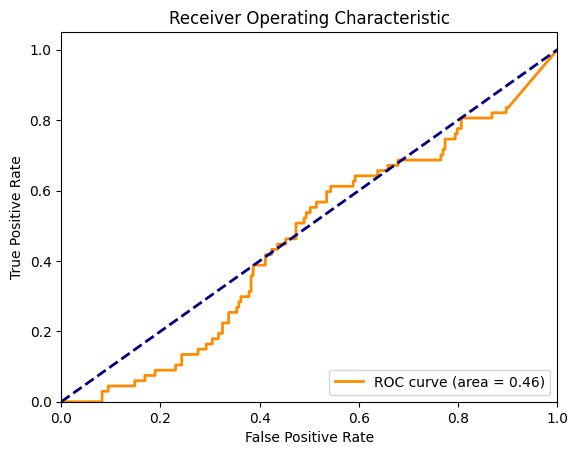

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

10/10 [==============================] - 0s 2ms/step


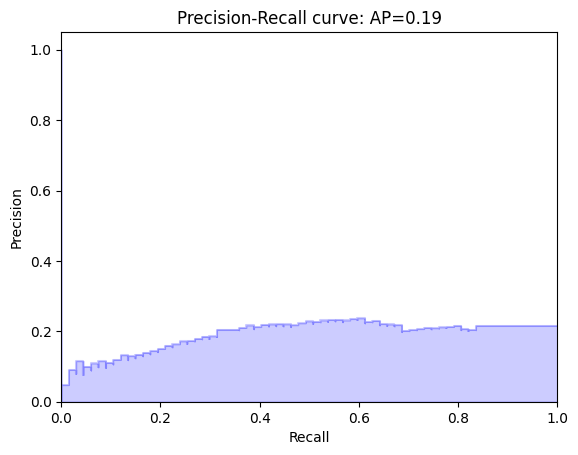

In [ ]:
#Precision-Recall Curve.
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_prob = model.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

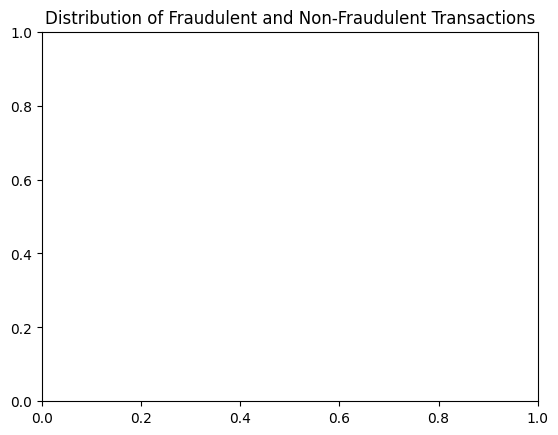

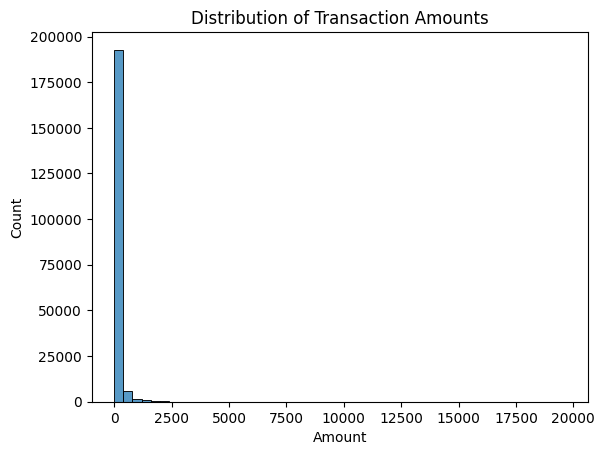

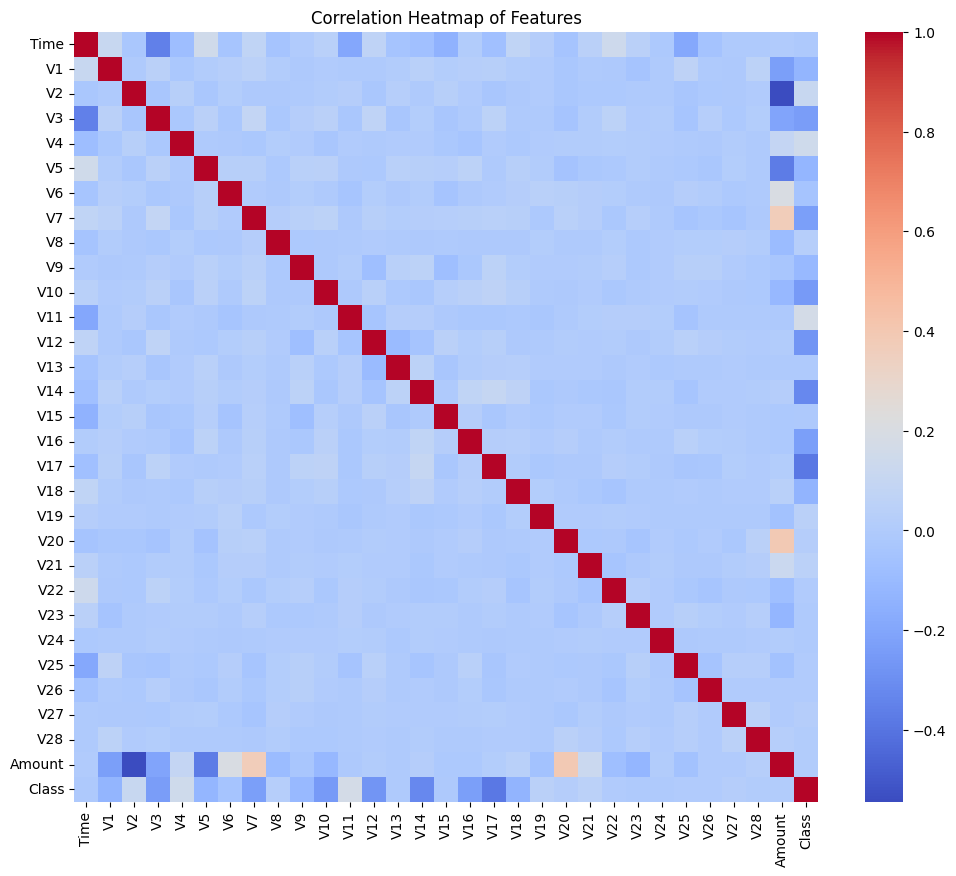

In [ ]:
#HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data= pd.read_csv('creditcard.csv')

# Check the distribution of the target variable (fraud or non-fraud)
sns.countplot=('Class', data==data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

# Check the distribution of the transaction amount
sns.histplot(data['Amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Check the correlation between the features
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


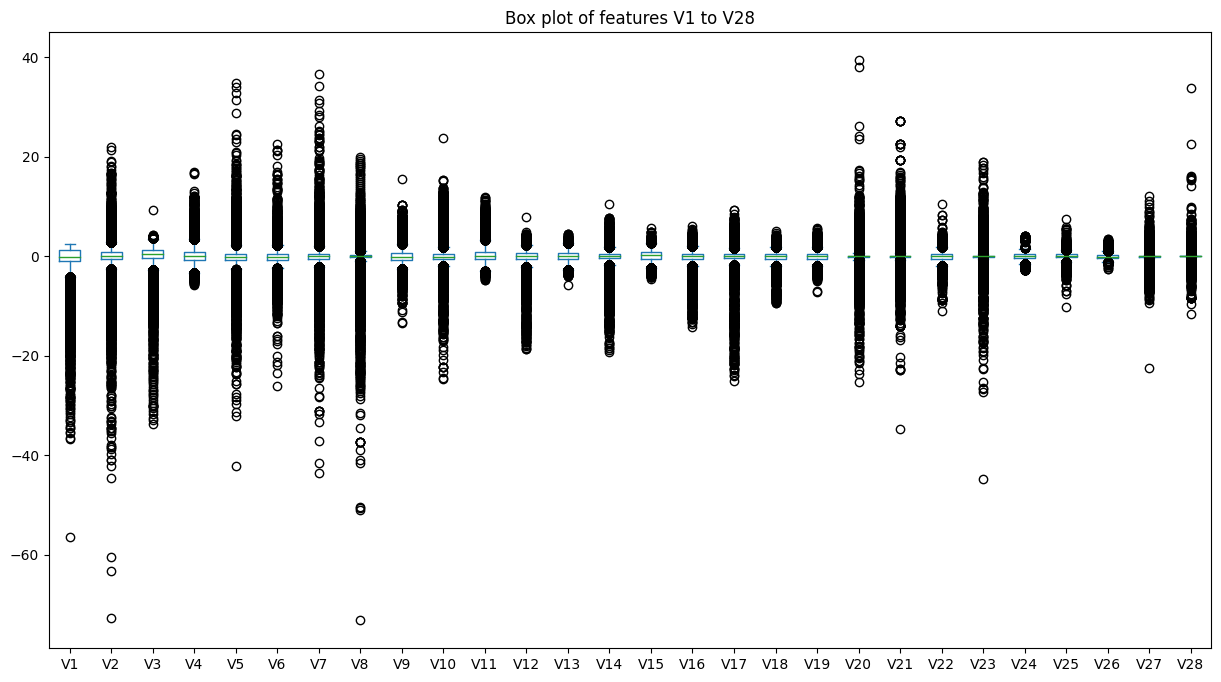

In [ ]:
#Box plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Plot box plot for features V1 to V28
data.iloc[:,1:29].plot(kind='box', figsize=(15,8))
plt.title('Box plot of features V1 to V28')
plt.show()

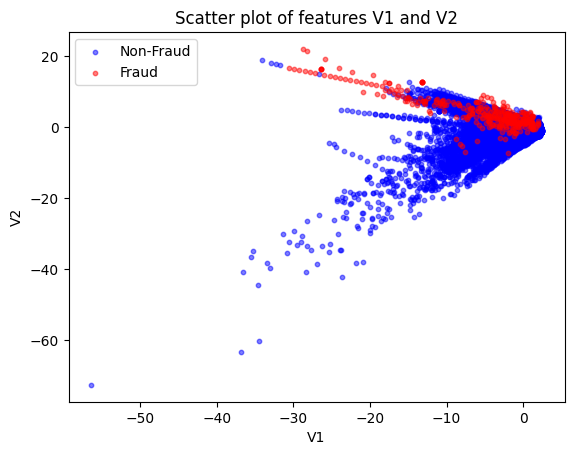

In [ ]:
#Scatter plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create scatter plot for features V1 and V2
plt.scatter(data['V1'][data['Class'] == 0], data['V2'][data['Class'] == 0], s=10, color='b', alpha=0.5)
plt.scatter(data['V1'][data['Class'] == 1], data['V2'][data['Class'] == 1], s=10, color='r', alpha=0.5)
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Non-Fraud', 'Fraud'], loc='upper left')
plt.title('Scatter plot of features V1 and V2')
plt.show()


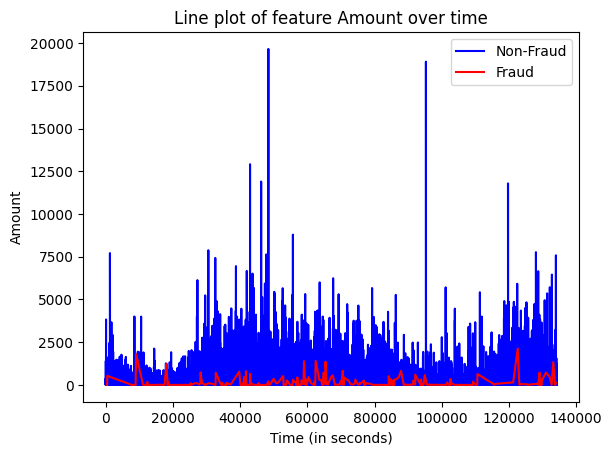

In [ ]:
#line plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create line plot for feature Amount over time
plt.plot(data['Time'][data['Class'] == 0], data['Amount'][data['Class'] == 0], color='b')
plt.plot(data['Time'][data['Class'] == 1], data['Amount'][data['Class'] == 1], color='r')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.legend(['Non-Fraud', 'Fraud'], loc='upper right')
plt.title('Line plot of feature Amount over time')
plt.show()


# **ANN(ARTIFICIAL NEURAL NETWORK)**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('creditcard.csv')

# Preprocessing
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0].sample(n=len(fraud)*3, random_state=42)
data = fraud.append(non_fraud).sample(frac=1, random_state=42)
X = data.drop(['Class', 'Time'], axis=1).values
y = data['Class'].values

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, batch_size=512, epochs=30, validation_data=(X_test, y_test))

# Evaluating the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set accuracy:", accuracy)


<ipython-input-139-3c7dc91d3e26>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud).sample(frac=1, random_state=42)


Epoch 1/30
3/3 [==============================] - 2s 110ms/step - loss: 0.7009 - accuracy: 0.5735 - val_loss: 0.5442 - val_accuracy: 0.9484
Epoch 2/30
3/3 [==============================] - 0s 23ms/step - loss: 0.5850 - accuracy: 0.7779 - val_loss: 0.4298 - val_accuracy: 0.9484
Epoch 3/30
3/3 [==============================] - 0s 24ms/step - loss: 0.4689 - accuracy: 0.8522 - val_loss: 0.3362 - val_accuracy: 0.9452
Epoch 4/30
3/3 [==============================] - 0s 23ms/step - loss: 0.3646 - accuracy: 0.9006 - val_loss: 0.2620 - val_accuracy: 0.9419
Epoch 5/30
3/3 [==============================] - 0s 24ms/step - loss: 0.3204 - accuracy: 0.9111 - val_loss: 0.2130 - val_accuracy: 0.9452
Epoch 6/30
3/3 [==============================] - 0s 23ms/step - loss: 0.2603 - accuracy: 0.9233 - val_loss: 0.1836 - val_accuracy: 0.9516
Epoch 7/30
3/3 [==============================] - 0s 24ms/step - loss: 0.2362 - accuracy: 0.9313 - val_loss: 0.1657 - val_accuracy: 0.9516
Epoch 8/30
3/3 [==========

10/10 [==============================] - 0s 3ms/step


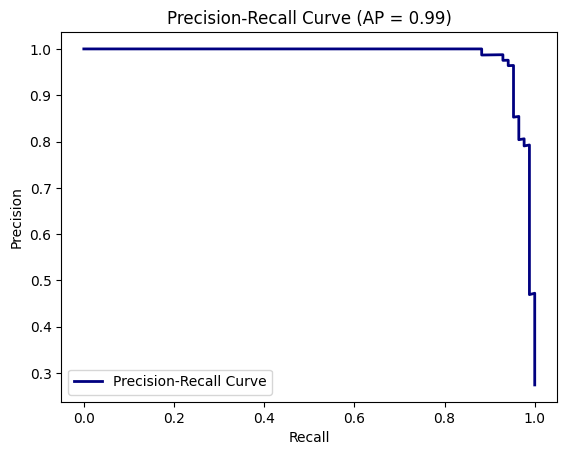

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# train your ANN model

# predict the probabilities of the test set
y_prob = model.predict(X_test)

# calculate the precision-recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# plot the precision-recall curve
plt.plot(recall, precision, color='navy', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP = %0.2f)' % (average_precision))
plt.legend(loc="lower left")
plt.show()


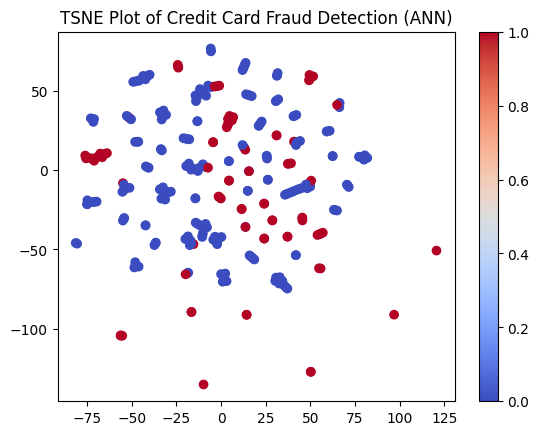

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=1, random_state=99)
X_embedded = tsne.fit_transform(X_test)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_test, cmap='coolwarm')
plt.colorbar()
plt.title('TSNE Plot of Credit Card Fraud Detection (ANN)')
plt.show()


